<a href="https://colab.research.google.com/github/AfifNurraihan/Metode_ARIMA/blob/main/ARIMA_Model_for_Time_Series_Forecasting_(Air_Passanger_)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

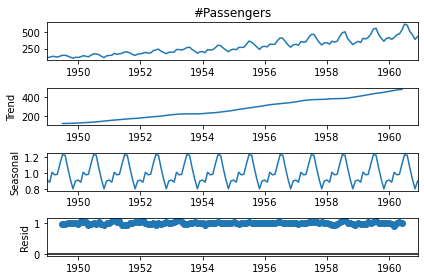

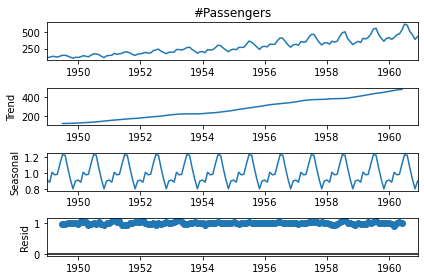

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
  
# Membaca AirPassengers dataset
airline = pd.read_csv('AirPassengers.csv',
                       index_col ='Month',
                       parse_dates = True)
  
# Membaca 5 Data Awal AirPassanger
airline.head()
  
# Dekomposisi ETS 
result = seasonal_decompose(airline['#Passengers'], 
                            model ='multiplicative')
  
# ETS plot 
result.plot()

#Analisis Parameter untuk model ARIMA

In [ ]:
# Import Library ARIMA 
from pmdarima import auto_arima
  
# Abaikan peringatan yang tidak berbahaya
import warnings
warnings.filterwarnings("ignore")
  
# Sesuaikan fungsi auto_arima dengan set data AirPassengers
stepwise_fit = auto_arima(airline['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # kami tidak ingin tahu apakah pesanan tidak berhasil
                          suppress_warnings = True,  # kami tidak ingin peringatan konvergensi
                          stepwise = True)           # diatur ke bertahap
  
# Mencetak ringkasan ARIMA
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.43 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.27 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.73 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.15 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.69 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 27 Apr 2021   AIC                           1019.178
Time:                                     06:46:21   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Sesuaikan Model ARIMA dengan dataset AirPassengers

In [ ]:
# Pisahkan data menjadi set pelatihan / pengujian
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # tetapkan satu tahun (12 bulan) untuk pengujian
  
# Pasang SARIMAX (0, 1, 1) x (2, 1, 1, 12) pada set pelatihan
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['#Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.012
Date:                            Tue, 27 Apr 2021   AIC                            896.024
Time:                                    06:46:23   BIC                            909.919
Sample:                                01-01-1949   HQIC                           901.666
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2986      0.075     -3.992      0.000      -0.445      -0.152
ar.S.L12       0.7096      0.229      3.095      0.002       0.260       1.159
ar.S.L24       0.2897      0.100      2.895      0.004       0.094       0.486
ma.S.L12      -0.9824      2.470     -0.398      0.691      -5.824       3.859
sigma2        88.2234    198.961      0.443      0.657    -301.733     478.179
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.86   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Prediksi Model ARIMA terhadap set tes

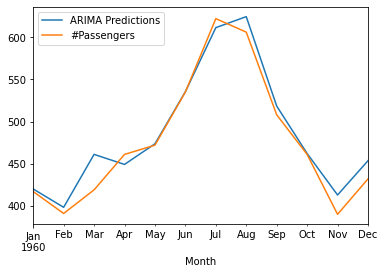

In [ ]:
start = len(train)
end = len(train) + len(test) - 1
  
# Prediksi untuk satu tahun terhadap set pengujian
predictions = result.predict(start, end,
                             typ = 'levels').rename("ARIMA Predictions")
  
# prediksi plot dan nilai aktual
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True)

#Evaluasi model menggunakan MSE dan RMSE

In [ ]:
# Muat alat evaluasi khusus
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Hitung root mean squared error
print('RMSE : ',rmse(test["#Passengers"], predictions))
  
# Hitung kesalahan kuadrat rata-rata
print('MSE : ', mean_squared_error(test["#Passengers"], predictions))

RMSE :  17.13252206467855
MSE :  293.5233122966973


#Peramalan menggunakan Model ARIMA

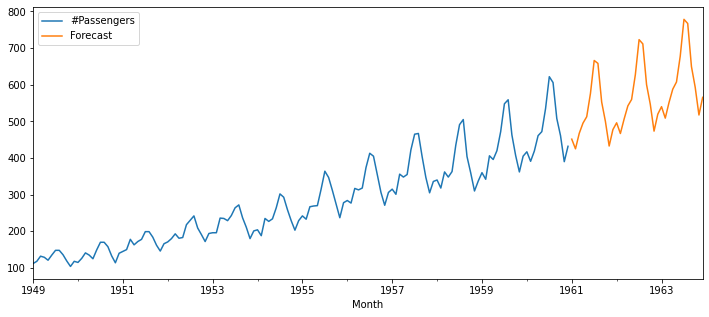

In [ ]:
# Latih model pada set data lengkap
model = model = SARIMAX(airline['#Passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Prakiraan untuk 3 tahun ke depan
forecast = result.predict(start = len(airline), 
                          end = (len(airline)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot nilai perkiraan
airline['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True) 